# Harvard class http://cs109.github.io/2015/pages/videos.html

### Week 2

In [232]:
from IPython.display import HTML
import numpy as np
from urllib.request import urlopen
import bs4 #this is beautiful soup
import time
import operator
import socket
import _pickle as cPickle
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [14]:
print ("Hello CS109")

print ("I love IPython")

# Ipython notebook have tab completion!
# and inbuild help
  
a = np.zeros(3)

Hello CS109
I love IPython


# Read the user data

In [15]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols)

users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# Read the ratings

In [19]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data',
    sep='\t', names=r_cols)
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


# Now data about the movies

In [27]:
# the movies file contains columns indicating the movie's genres
# let's only load the first columns of the file with usecols

m_cols = ['movie_id', 'title', 'release_date',
         'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item',
    sep='|', names=m_cols, usecols=range(5), encoding='iso-8859-1', engine='python')

movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [30]:
print (movies.dtypes)
print
print (movies.describe())

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object
          movie_id  video_release_date
count  1682.000000                 0.0
mean    841.500000                 NaN
std     485.695893                 NaN
min       1.000000                 NaN
25%     421.250000                 NaN
50%     841.500000                 NaN
75%    1261.750000                 NaN
max    1682.000000                 NaN


# Selecting data 

- DataFrame => group of series with shared index
- single DataFrame column => Series

In [37]:
users.head()
users['occupation'].head()

columns_you_want = ['occupation', 'sex']
users[columns_you_want].head()

print(users.head())
print(users.iloc[3])

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213
user_id                4
age                   24
sex                    M
occupation    technician
zip_code           43537
Name: 3, dtype: object


# Filtering data

In [40]:
oldUsers = users[users.age > 25]
oldUsers.head()

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


# Quiz

- show users aged 40 and male
- show the mean age of female programmers

In [49]:
#show users aged 40 and male
users[(users.age == 40) & (users.sex == 'M')].head(3)

# print(users.head())

#show the mean age of female programmers
selected_users = users[(users.sex == 'F') & (users.occupation == 'programmer')]

print(selected_users.describe())

#alternatives
print(selected_users.age.mean())
print(selected_users['age'].mean())

          user_id        age
count    6.000000   6.000000
mean   411.166667  32.166667
std    149.987222   5.115336
min    292.000000  26.000000
25%    313.000000  28.250000
50%    378.000000  32.000000
75%    416.750000  36.500000
max    698.000000  38.000000
32.166666666666664
32.166666666666664


# Split-apply-combine

- splitting the data into groups based on some criteria
- applying a function to each group independently
- combining the results into a data structure

# Split-apply-combine

<img src=http://i.imgur.com/yjNkiwL.png></img>

# Find Diligent Users

- split data per user ID
- count ratings
- combine result

In [58]:
print(ratings.head())

#split data
grouped_data = ratings.groupby('user_id')
# grouped_data = ratings['movie_id'].groupby(ratings['user_id'])

#count and combine
ratings_per_user = grouped_data.count()

ratings_per_user.head(5)

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596


,movie_id,rating,unix_timestamp
user_id,,,
1,272,272,272
2,62,62,62
3,54,54,54
4,24,24,24
5,175,175,175


# Quiz

- get the average rating per movie
- advanced: get the movie titles with the highest average rating

In [74]:
#split data
grouped_data = ratings['rating'].groupby(ratings['movie_id'])

# average and combine
average_ratings = grouped_data.mean()
print("Average ratings: ")
print(average_ratings.head())
print()

# get the maximum rating 
maximum_rating = average_ratings.max()

#get movie ids with that rating

good_movie_ids = average_ratings[average_ratings == maximum_rating].index

Average ratings: 
movie_id
1    3.878319
2    3.206107
3    3.033333
4    3.550239
5    3.302326
Name: rating, dtype: float64



In [75]:
print("Good movies: ")
print(good_movie_ids)
print()

Good movies: 
Int64Index([814, 1122, 1189, 1201, 1293, 1467, 1500, 1536, 1599, 1653], dtype='int64', name='movie_id')



In [76]:
print("Best movie titles:")
print(movies[movies.movie_id.isin(good_movie_ids)].title)

Best movie titles:
813                         Great Day in Harlem, A (1994)
1121                       They Made Me a Criminal (1939)
1188                                   Prefontaine (1997)
1200           Marlene Dietrich: Shadow and Light (1996) 
1292                                      Star Kid (1997)
1466                 Saint of Fort Washington, The (1993)
1499                            Santa with Muscles (1996)
1535                                 Aiqing wansui (1994)
1598                        Someone Else's America (1995)
1652    Entertaining Angels: The Dorothy Day Story (1996)
Name: title, dtype: object


In [77]:
how_many_ratings = grouped_data.count()
print("Number of ratings per movie: ")
print(how_many_ratings[average_ratings == maximum_rating])

Number of ratings per movie: 
movie_id
814     1
1122    1
1189    3
1201    1
1293    3
1467    2
1500    2
1536    1
1599    1
1653    1
Name: rating, dtype: int64


# Passing a Function

In [81]:
average_ratings = grouped_data.apply(lambda f: f.mean) # programar própria função
average_ratings.head()

movie_id
1    <bound method Series.mean of 24       4\n454  ...
2    <bound method Series.mean of 172      3\n264  ...
3    <bound method Series.mean of 302      2\n2507 ...
4    <bound method Series.mean of 48       5\n170  ...
5    <bound method Series.mean of 78       3\n1458 ...
Name: rating, dtype: object

# Quiz

- get the average rating per user
- advanced: list all occupations and if they are male or female dominate

In [95]:
# get the average rating per user
grouped_data = users['sex'].groupby(users['occupation'])
male_dominant_occupations = grouped_data.apply(lambda f:
                                                sum(f == 'M') > sum(f == 'F'))

print(male_dominant_occupations)
print("\n")

occupation
administrator     True
artist            True
doctor            True
educator          True
engineer          True
entertainment     True
executive         True
healthcare       False
homemaker        False
lawyer            True
librarian        False
marketing         True
none              True
other             True
programmer        True
retired           True
salesman          True
scientist         True
student           True
technician        True
writer            True
Name: sex, dtype: bool




In [96]:
print("number of male users:")
print(sum(users['sex'] == 'M'))

print('number of female users:')
print(sum(users['sex'] == 'F'))

number of male users:
670
number of female users:
273


# Pandas "wrapup"

- create data frames
- get sub-frames
- filter data
- use group-by
- apply a user defined function

# Python data scraping

- Why scrape the web?
  - vast source 
  - automate tasks 
  - keep up with sites
  - fun!

# Read and Tweet

ReadTweet

- by Justin Blinder
- http://projects.justinblinder.com/We-Read-We-Tweet

“We Read, We Tweet” geographically visualizes the dissemination of New York Times articles through Twitter. Each line connects the location of a tweet to the contextual location of the New York Times article it referenced. The lines are generated in a sequence based on the time in which a tweet occurs. The project explores digital news distribution in a temporal and spatial context through the social space of Twitter.

# Twitter sentiments

http://www.csc.ncsu.edu/faculty/healey/tweet_viz/figs/tweet-viz-ex.png

- by Healey and Ramaswamy
- http://www.csc.ncsu.edu/faculty/healey/tweet_viz/tweet_app/

Type a keyword into the input field, then click the Query button. Recent tweets that contain your keyword are pulled from Twitter and visualized in the Sentiment tab as circles. Hover your mouse over a tweet or click on it to see its text.



# Python data scraping

- copyrights and permission:
  - be careful and polite
  - give credit
  - care about media law
  - don't be evil (no spam, overloading sites, etc.)

# Robots.txt

- specified by web site owner
- gives instructions to web robots (aka your script)
- is located at the top-level directory of the web server

http://www.example.com/robots.txt

If you want you can also have a look at

http://google.com/robots.txt

# Robots.txt

#### What does this one do?

User-agent: Google Disallow: User-agent: * Disallow: /

Answer: This file allows google to search through everything on the server, while all others should stay completely away.

## Things to consider:

- can be just ignored
- can be a security risk - Why?

Answer: You are basically telling everybody who cares to look into the file where you have stored sensitive information.



# Scraping with Python:

- scraping is all about HTML tags
- bad news:
  - need to learn about tags
  - websites can be ugly

# HTML

- HyperText Markup Language
- standard for creating webpages
- HTML tags

have angle brackets
typically come in pairs
This is an example for a minimal webpage defined in HTML tags. The root tag is <html> and then you have the <head> tag. This part of the page typically includes the title of the page and might also have other meta information like the author or keywords that are important for search engines. The <body> tag marks the actual content of the page. You can play around with the <h2> tag trying different header levels. They range from 1 to 6.

In [104]:
htmlString = """<!DOCTYPE html>
<html>
    <head>
        <title>This is a title</title>
    </head>
    <body>
        <h2> Test </h2>
        <p>Hello world!</p>
    </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput

# Useful Tags

- heading `<h1></h1>...<h6></h6>`
- paragraph `<p></p>`
- line break `<br>`
- link with attribute

<a href="http://www.example.com/">An example link</a>

# Scraping with Python:

- example of a beautifully simple webpage:

http://www.crummy.com/software/BeautifulSoup

# Scraping with Python:

- good news:
  - some browsers help
  - look for: inspect element
  - need only basic html

#### Try 'Ctrl-Shift I' in Chrome

#### Try 'Command-Option I' in Safari

# Scraping with Python

- different useful libraries:
- urllib
- beautifulsoup
- pattern
- soupy
- LXML
- ...


The following cell just defines a url as a string and then reads the data from that url using the urllib library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [121]:
url = 'http://www.crummy.com/software/BeautifulSoup'
source = str(urlopen(url).read())
print(source)

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"\n"http://www.w3.org/TR/REC-html40/transitional.dtd">\n<html>\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<title>Beautiful Soup: We called him Tortoise because he taught us.</title>\n<link rev="made" href="mailto:leonardr@segfault.org">\n<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">\n<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">\n<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">\n<meta name="author" content="Leonard Richardson">\n</head>\n<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">\n<style>\n#tidelift { }\n\n#tidelift a {\n border: 1px solid #666666;\n margin-left: auto;\n padding: 10px;\n text-decoration: none;\n}\n\n#tidelift .cta {\n background: url("tidelift.svg") no-repeat;\n padding-left: 30px;\n}\n</style>\t\t   \n\n<img align="right" src="1

# Quiz :

- Is the word 'Alice' mentioned on the beautiful soup homepage?
- How often does the word 'Soup' occur on the site?
  - hint: use .count()
- At what index occurs the substring 'alien video games' ?
  - hint: use .find()

In [131]:
print( 'Alice' in str(source))

print(source.count('Soup'))

#find index of alien video games
position = source.find('Leonard Richardson')
print(position)

#quick test to see the substring in the source variable 
print(source[position:position+20])

print(source[position:position+len('Leonard Richardson')])

False
50
623
Leonard Richardson">
Leonard Richardson


# Beatiful Soup

- designed to make your life easy
- many good functions for parsing html code

# Some examples

## Example 1

In [143]:
# get bs4 object 
soup = bs4.BeautifulSoup(source)

#compare the two print statements 
print(soup)
print(soup.prettify())

#show how to find all a tags
soup.findAll('a')

soup.findAll("Soup")#doesn't not work because Soup is not an HTML tag. It is just a string that occours in the webpage.

<html><body><p>b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">
n"http://www.w3.org/TR/REC-html40/transitional.dtd"&gt;\n\n</p>\n<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n<title>Beautiful Soup: We called him Tortoise because he taught us.</title>\n<link href="mailto:leonardr@segfault.org" rev="made"/>\n<link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>\n<meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>\n<meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>\n<meta content="Leonard Richardson" name="author"/>\n\n\n<style>\n#tidelift { }\n\n#tidelift a {\n border: 1px solid #666666;\n margin-left: auto;\n padding: 10px;\n text-decoration: none;\n}\n\n#tidelift .cta {\n background: url("tidelift.svg") no-repeat;\n padding-left: 30px;\n}\n</style>\t\t   \n\n<img align="right" src="10.1.jpg" width="250"/><br/>\n\n<p>[ <a href="#Download">Download

[]

## Example 2

In [147]:
# get attribute value from an element:
# find tag: this only returns the first occurence, not all tags in the string 
first_tag = soup.find('a')

#get attribute href
first_tag.get('href')

# get all links in the page
link_list = [l.get('href') for l in soup.findAll('a')]
link_list

['#Download',
 None,
 '#HallOfFame',
 'enterprise.html',
 'https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'zine/',
 'bs4/download/',
 None,
 None,
 'bs4/doc/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 None,
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'zine/',
 None,
 'bs4/download/',
 None,
 None,
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 None,
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 None,
 'https://blog.tidelift.com/how-open-source-software-is-fighting-covid-19',

In [150]:
# filter all external links
# create an empty list to collect the valid links
external_links = []

# write a loop to filter the links
# if it starts with http we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://blog.tidelift.com/how-open-source-software-is-fighting-covid-19',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://www2.ljworld.com/',
 'http://esrl.noaa.gov/gsd/fab/',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://creativecommons.

In [153]:
# lets investigate. Have a close look at the link_list:
link_list

#Seems that there are None elements!
#Let's verify
print(sum([l is None for l in link_list]))

#So there are two elements in the list that are None!

16


In [160]:
# Let's filter those objects out in the for loop
external_links = []

# write a loop to filter the links 
# if it is not None and starts with http we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://blog.tidelift.com/how-open-source-software-is-fighting-covid-19',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://www2.ljworld.com/',
 'http://esrl.noaa.gov/gsd/fab/',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://creativecommons.

Note: The above if condition works because of lazy evaluation in Python. The and statement becomes False if the first part is False, so there is no need to ever evaluate the second part. Thus a None entry in the list gets never asked about its first four characters.

In [163]:
# and we can put this in a list comprehension as well, it almost reads like
# a sentence

[l for l in link_list if l is not None and l.startswith('http')]

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://blog.tidelift.com/how-open-source-software-is-fighting-covid-19',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://www2.ljworld.com/',
 'http://esrl.noaa.gov/gsd/fab/',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://creativecommons.

# Parsing the Tree

In [169]:
# redifining s without any line breaks
s = """<!DOCTYPE html><html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>"""
#get bs4 object
tree = bs4.BeautifulSoup(s)

# get html root node
root_node = tree.html

#get head from root using contents
head = root_node.contents[0]
print(head)

# get body from root
body = root_node.contents[1]

# could directly access body
tree.body

<head><title>This is a title</title></head>


<body><h3> Test </h3><p>Hello world!</p></body>

# Quiz:

- Find the h3 tag by parsing the tree starting at body
- Create a list of all Hall of Fame entries listed on the Beautiful Soup webpage
  - hint: it is the only unordered list in the page (tag ul)


In [172]:
body.contents[0]

<h3> Test </h3>

In [176]:
# use ul as entry point
entry_point = soup.find('ul')

#get hall of fame list from entry point
# skip the first entry
hall_of_fame_list = entry_point.contents[1:]

# reformat into a list containing strings
tmp = []
for li in hall_of_fame_list:
    tmp.append(li.contents)

tmp now is actually a list of lists containing the hall of fame entries. Here is some advanced Python on how to print really just one entry per list item.

The cool things about this are:

- The use of "" to just access the join function of strings.
- The join function itself
- That you can actually have two nested for loops in a list comprehension

In [182]:
test = ["".join(str(a) for a in sublist) for sublist in tmp]

print('\n'.join(test))

<a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable\n Type"</a>, a work of digital art on display in the lobby of the New\n York Times building, uses Beautiful Soup to scrape news feeds.\n\n
Jiabao Lin\'s <a>DXY-COVID-19-Crawler</a>\nuses Beautiful Soup to scrape a Chinese medical site for information\nabout COVID-19, making it easier for researchers to track the spread\nof the virus. (Source: <a href="https://blog.tidelift.com/how-open-source-software-is-fighting-covid-19">"How open source software is fighting COVID-19"</a>)\n\n
Reddit uses Beautiful Soup to <a>parse\na page that\'s been linked to and find a representative image</a>.\n\n
Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business\n activities</a> of an arms merchant.\n\n
The developers of Python itself used Beautiful Soup to <a>migrate the Python\nbug tracker from Sourceforge to Roundup</a>.\n\n
The <a href="http://www2.ljworld.com/">Lawre

# Example

## ideia by Jesse Steinweg-Woods


# Scraping data science skills

- What skills are in demand for data scientists?
- Should we have a lecture on Spark or only on MapReduce?

We want to scrape the information from job advertisements for data scientists from indeed.com Let's scrape and find out!

In [206]:
# Fixed url for job postings containing data scientist
url = 'http://www.indeed.com/jobs?q=data+scientist&l='

# read the website
source = urlopen(url).read()

# parse html code
bs_tree = bs4.BeautifulSoup(source)

# print(bs_tree)

In [217]:
# see how many job postings we found
job_count_string = bs_tree.find(id = 'searchCountPages').contents[0]
# print(bs_tree.find(id = 'searchCountPages').contents[0])
job_count_string = job_count_string.split()[-2]
print("Search yielded %s hits." % (job_count_string))

# not that job_count so far is still a string, 
# not an integer, and the , separator prevents 
# us from just casting it to int

job_count_digits = [int(d) for d in job_count_string if d.isdigit()]
job_count = np.sum([digit*(10**exponent) for digit, exponent in 
                    zip(job_count_digits[::-1], range(len(job_count_digits)))])

print(job_count)

Search yielded 7,640 hits.
7640


In [323]:
# the website is only listing 10 results per page 
# so we need to scrape them page after page
num_pages = int(np.ceil(job_count/10.0))

base_url = 'http://www.indeed.com'
job_links = []
for i in range(20): #do range(num_pages) if you want them all
    if i%10 == 0:
        print(num_pages-i)
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = urlopen(url).read() 
    bs_tree = bs4.BeautifulSoup(html_page)
    job_link_area = bs_tree.find(id = 'resultsCol')
#     print(job_link_area)
    job_postings = job_link_area.findAll("div")
    job_postings = [jp for jp in job_postings if not jp.get('class') is None 
                    and "result" in ''.join(jp.get('class'))]
    job_ids = [jp.get('data-jk') for jp in job_postings if not jp.get('data-jk') is None]
    print(job_ids)
    # go after each link
    for id in job_ids:
        job_links.append(base_url + '/rc/clk?jk=' + str(id) )

    time.sleep(1)
    
print("We found a lot of jobs: ", len(job_links))

764
['11baba484db23433', '92ad57982839edc2', 'ca80c5b22fb5c17c', '57125117d2b4b0f6', '237a8f95bf4e2a81', '0c3753f6fd1faa4b', 'c593b0f800cfe8c5', 'fbeea94f7df5fe44', '550955760d9e09c7', '1636faa0308fd08f']
['b58477c00d0f7c47', 'd55bbf7298515fa9', '7ee6e4997258f140', 'd5326d3f749525a9', '1fdf3e7046700cb8', 'edf12475cad32cd4', 'b7b426b3b63eba64', '5a3c557ab2eea651', '487e4faffd4a73cd', '5f2008986b0bc356']
['713a18435c58ced8', '1edbd1e0661eed09', '0fd42b9ad83ee968', 'b31560d243ffd111', 'a1b09b1947c40fbc', 'cf3a6989c432f42e', '6e34fec35d4d56cb', '9121a626647be6ec', '4b5160535b55a659', '962291d23f0b6d1b']
['6f2c2e6ca8e1620f', '45c7f8c9e819c9b4', 'c5cb940ec07c67e8', 'ab6e316f1d58bcb8', '9a847d2a651cb554', '1b368933f65af62e', '8ab3dec332129577', 'bb1ce7e6342cee9d', 'bf3d97e592ae3763', 'eee4613643cd9caf']
['15569e014e1cb191', '6e7b4efe3821eb15', '95a5de89ec4b02ad', '8026bc3cf2c3c7a0', 'aed6be8d436be336', '7c3544ff28fd7070', '85a0ad0db285a914', 'baa3ad46d10a2591', '244175ca0dd7b3ef', 'cf784b0f0d

# Some precautions to enable us to restart our search

In [324]:
# Save the scraped links
with open('scraped_links.pkl', 'wb') as f:
    cPickle.dump(job_links, f)

# Read canned scraped links
with open('scraped_links.pkl', 'rb') as f:
#     encoded = cPickle.decode('latin1')
    job_links = cPickle.load(f)

In [325]:
skill_set = {'mapreduce': 0, 'spark': 0}

## write initialization into a file, so we can restart later
#with open('scraped_links_restart.pkl', 'wb') as f:
#    cPickle.dump((skill_set, 0),f)

# Python Dictonaries

- build in data type
- uses key: value pairs

In [326]:
a = {'a': 1, 'b': 2}
print(a)

#show keys
print(a.keys())

#show values
print(a.values())

# show for loop over all entries 
# option 1 using zip
# these works also for iterating over any 
# other two lists
for k, v in zip(a.keys(), a.values()):
    print(k, v)

# option 2 using the dictionary iteritems() function
for k,v in a.items():
    print(k,v)

{'a': 1, 'b': 2}
dict_keys(['a', 'b'])
dict_values([1, 2])
a 1
b 2
a 1
b 2


In [329]:
counter = 0

# print(job_links)
index = 0
for link in job_links[index:]:
    counter +=1  
    
    try:
        html_page = urlopen(link).read()
    except:
        print("An exception occur")
        continue

    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters
        
    for key in skill_set.keys():
        if key in html_text:  
            skill_set[key] +=1
            
    if counter % 25 == 0:
        print(len(job_links) - counter - index)
#         print(skill_set)
        with open('scraped_links_restart.pkl','wb') as f:
            cPickle.dump((skill_set, index+counter),f)

An exception occur
195
{'mapreduce': 0, 'spark': 1}
190
{'mapreduce': 0, 'spark': 2}
185
{'mapreduce': 1, 'spark': 3}
180
{'mapreduce': 1, 'spark': 5}
175
{'mapreduce': 1, 'spark': 5}
An exception occur
170
{'mapreduce': 1, 'spark': 6}
An exception occur
165
{'mapreduce': 1, 'spark': 8}
160
{'mapreduce': 1, 'spark': 10}
An exception occur
155
{'mapreduce': 2, 'spark': 13}
150
{'mapreduce': 2, 'spark': 13}
145
{'mapreduce': 2, 'spark': 16}
140
{'mapreduce': 2, 'spark': 17}
An exception occur
135
{'mapreduce': 2, 'spark': 17}
An exception occur
An exception occur
An exception occur
130
{'mapreduce': 2, 'spark': 17}
125
{'mapreduce': 2, 'spark': 18}
120
{'mapreduce': 2, 'spark': 18}
115
{'mapreduce': 2, 'spark': 19}
110
{'mapreduce': 2, 'spark': 20}
105
{'mapreduce': 2, 'spark': 20}
100
{'mapreduce': 2, 'spark': 21}
95
{'mapreduce': 2, 'spark': 22}
90
{'mapreduce': 2, 'spark': 23}
An exception occur
An exception occur
85
{'mapreduce': 2, 'spark': 24}
80
{'mapreduce': 2, 'spark': 26}
An ex

In [330]:
print(skill_set)

{'mapreduce': 5, 'spark': 38}


In [336]:
# This code below does the trick, but could be optimized for speed if necessary
# e.g. skills are typically listed at the end of the webpage
# might not need to split/join the whole webpage, as we already know
# which words we are looking for 
# and could stop after the first occurance of each word

with open('scraped_links_restart.pkl', 'rb') as f:
    skill_set, index = cPickle.load(f)
    print ("How many websites still to go? ", len(job_links) - index)

How many websites still to go?  0


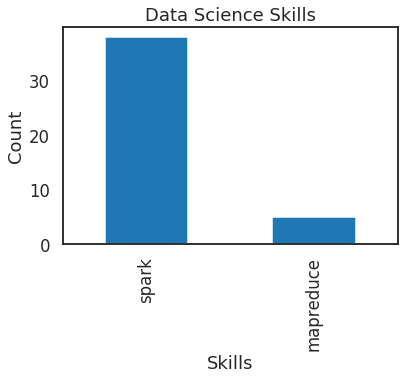

In [343]:
pseries = pd.Series(skill_set)
pseries.sort_values(ascending=False, inplace=True)

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.show()

# Some more regular expressions:

# Another Example

## Designed by Katharine Jarmul

https://github.com/kjam/python-web-scraping-tutorial

# Scraping Happy Hours

Scrape the happy hour list of LA for personal preferences

http://www.downtownla.com/3_10_happyHours.asp?action=ALL

This example is part of her talk about data scraping at PyCon2014. She is a really good speaker and I enjoyed watching her talk. Check it out: http://www.youtube.com/watch?v=p1iX0uxM1w8

In [355]:
stuff_i_like = ['buger', 'sushi', 'seet potato fries', 'BBQ', 'beer']
found_happy_hours = []
my_happy_hours = []

# First, I'm going to identify the areas of the page I want to look at
url = 'https://downtownla.com/explore/dining-and-drinks/happy-hour-finder'
source = urlopen(url).read()
tables = bs4.BeautifulSoup(source)

print(tables)

<!DOCTYPE html>
<html lang="en" prefix="og: http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="noodp" name="robots"/>
<title>Happy Hour Finder | Explore | Downtown LA</title>
<link href="https://downtownla.com/explore/dining-and-drinks/happy-hour-finder" rel="canonical"/>
<meta content="website" property="og:type"/>
<meta content="https://downtownla.com/explore/dining-and-drinks/happy-hour-finder" property="og:url"/>
<meta content="DowntownLA.com" property="og:site_name"/>
<meta content="https://downtownla.com/_files/images/exploredininghappy-hoursocial1200x600.jpg" property="og:image"/>
<meta content="1200" property="og:image:width"/>
<meta content="600" property="og:image:height"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="@downtown_la" name="twitter:site"/>
<meta content="https://downtownla.com/_f

In [356]:
# Then, I'm going to sort out the *exact* parts of the page
# that match what I'm looking for...

for t in tables.findAll('div', {'class': 'gcard-address'}):
    text = t.text
    for s in t.findNextSiblings():
        text += '\n'+s.text
    found_happy_hours.append(text)
    
print("The scraper found %d happy hours!" % len(found_happy_hours))

The scraper found 72 happy hours!


In [358]:
# Now I'm going to loop through the food I like
# and see if any of the happy hour descriptions match

for food in stuff_i_like:
    for hh in found_happy_hours:
        # checking for text AND making sure I don't have duplicates
        if food in hh and hh not in my_happy_hours:
            print("YAY! I found some %s!" % food)
            my_happy_hours.append(hh)
print("I think you might like %d of them, yipeeeee!" % len(my_happy_hours))

YAY! I found some sushi!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
I think you might like 20 of them, yipeeeee!


In [368]:
# Now, let's make a mail message we can read:
message = 'Hey Silvana,\n\n\n'
message += 'OMG, I found some stuff for you in Downtown, take a look.\n\n'
message += '==============================\n'.join(my_happy_hours)
message = str(message.encode('utf-8'))
# To read more about encoding:
# http://diveintopython.org/xml_processing/unicode.html
message = message.replace('\t', '').replace('\r', '')
message += '\n\nXOXO,\n Your Py Script'

print(message)

b"Hey Silvana,\n\n\nOMG, I found some stuff for you in Downtown, take a look.\n\nMonday-Friday4:00pm - 7:00pm\nWeekday Happy HourDelicious hand-crafted cocktails, imported beers, full sake, wine, and liquor menu, sushi and Robata sampler plates, light bites-- all available at the bar, indoor lounge, or our open-air outdoor patio.==============================\nMonday-Friday5:00pm - 7:00pm\nBar & KitchenBar & Kitchen is a new-American restaurant with influences of Spanish and farm-fresh local Californian cuisine. Matched to this, Bar & Kitchen's beverages focus on wines from small producers, beers from craft brewers, and classic mixed drink.==============================\nMonday-Friday4:30pm - 6:30pm\nWeekday  Happy Hour$7 well drinks, beers, Sangria, margaritas, and house wine\r\n$6 draft beers\r\nDiscounted appetizers==============================\nMonday-Friday3:30pm - 6:30pm\nWeekday Happy HourBrewpub offering craft beers, American grub & city skyline views from 4th-floor outdoor pa

# Twitter Example

- API a bit more complicated
- libraries make life easier
- python-twitter

https://github.com/bear/python-twitter

What we are going to do is scrape Joe's twitter account, and then filter it for the interesting tweets. Defining interesting as tweets that have be re-tweeted at least 10 times.

In [397]:
import twitter

# define the necessary keys
cKey = ''
cSecret = ''
aKey = ''
aSecret = ''

# create the api object with the twitter-python library
api = twitter.Api(consumer_key=cKey, consumer_secret=cSecret, access_token_key=aKey, access_token_secret=aSecret)

In [404]:
# get the user timeline with with screen_name = stat110
twitter_statuses = api.GetUserTimeline(screen_name = 'stat110')

# print(twitter_statuses)
# create a data frame
# first get a list of panda Series or dict
pdSeriesList = [pd.Series(t.AsDict()) for t in twitter_statuses]
# print(pdSeriesList)

#then create the data frame
data = pd.DataFrame(pdSeriesList)

data.head(2)

,created_at,hashtags,id,id_str,lang,retweet_count,retweeted_status,source,text,urls,user,user_mentions,quoted_status_id,quoted_status_id_str,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,truncated,quoted_status
0,Thu May 07 15:51:00 +0000 2020,[],1258424101707841539,1258424101707841539,en,15.0,{'created_at': 'Thu May 07 15:25:02 +0000 2020...,"<a href=""https://mobile.twitter.com"" rel=""nofo...","RT @BaumerBen: RIP George Cobb, who I will rem...",[],{'created_at': 'Sun Aug 29 21:10:55 +0000 2010...,"[{'id': 1365606414, 'id_str': '1365606414', 'n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wed May 06 00:35:36 +0000 2020,[],1257831344501067777,1257831344501067777,en,1294.0,{'created_at': 'Tue May 05 16:24:48 +0000 2020...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @jasonfurman: This might be the lowest poin...,[],{'created_at': 'Sun Aug 29 21:10:55 +0000 2010...,"[{'id': 279036722, 'id_str': '279036722', 'nam...",1.257680e+18,1257680258364555264,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
#filter tweets with enough retweet_count
maybe_interesting = data[data.retweet_count > 20]

#get the text of these tweets
tweet_text = maybe_interesting.text

#print them out
text = tweet_text.values

for t in text:
    print('######')
    print(t)

######
RT @jasonfurman: This might be the lowest point in the 74 year history of the Council of Economic Advisers. The stakes on the epidemiologic…
######
RT @drob: The "cubic model" from @CEA + Kevin Hassett was pretty clearly fit on log(deaths + 1). Which is... pretty dangerous for forecasti…
######
RT @seanjtaylor: NB: don't settle for polynomials when you're extrapolating. https://t.co/gPGy2rbWJi
######
RT @EpiEllie: This is probably one of the most important tweets you’ll see today. Those headlines saying 88% of people on vents die? They c…
######
RT @wfithian: I have been corresponding with the authors of the well-known Santa Clara County COVID-19 preprint, and I am alarmed at their…
######
RT @PierreEJacob: trying to collect links to statistics-related online seminars here: https://t.co/IB4s2JnBbl suggestions welcome!
######
RT @KellyBodwin: Pssssttt..... hey kids.... wanna learn some Advanced Statistical Computing with R?

@hglanz and I are making our course ma…
######
RT @aveh

# Extracting columns:

## Warning: The returned column tweet_text is a view on the data

- it is not a copy
- you change the Series => you change the DataFrame

Below is another example of such a view:

In [416]:
## create a view for favorite_count on maybe_interesting
view = maybe_interesting['favorite_count']
print('-----------------')
print("This is view:")
print(view)
## change a value
view[8] = 9999

## look at original frame
print('-----------------')
print("This is view after changing view[8]")
print(view)

print('-----------------')
print("This is maybe_interesting after changing view[8]")
print("It changed too!")
print(maybe_interesting['favorite_count'])

## to avoid this you can use copy
independent_data = maybe_interesting['favorite_count'].copy()
independent_data[10] = 999
print('-----------------')
print("This is independent_data after changed at 10:")
print(independent_data)
print('-----------------')
print("This is maybe_interesting after changing independent_data:")
print("It did not change because we only changed a copy of it")
print(maybe_interesting['favorite_count'])

-----------------
This is view:
1        NaN
2        NaN
3        NaN
6        NaN
7        NaN
11       NaN
12       NaN
14       NaN
15       NaN
8     9999.0
Name: favorite_count, dtype: float64
-----------------
This is view after changing view[8]
1        NaN
2        NaN
3        NaN
6        NaN
7        NaN
11       NaN
12       NaN
14       NaN
15       NaN
8     9999.0
Name: favorite_count, dtype: float64
-----------------
This is maybe_interesting after changing view[8]
It changed too!
1        NaN
2        NaN
3        NaN
6        NaN
7        NaN
11       NaN
12       NaN
14       NaN
15       NaN
8     9999.0
Name: favorite_count, dtype: float64
-----------------
This is independent_data after changed at 10:
1        NaN
2        NaN
3        NaN
6        NaN
7        NaN
11       NaN
12       NaN
14       NaN
15       NaN
8     9999.0
10     999.0
Name: favorite_count, dtype: float64
-----------------
This is maybe_interesting after changing independent_data:
It did no

/home/silvana/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
